In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Path to your Excel file
file_path='security_checkpoint_data.xlsx'

# Define your mapping
lane_mapping = {
    '2018_02_23': 'o1',
    '2018_03_01': 'o2',
    '2018_03_10': 'o3',
    '2018_03_12': 'o4',
    '2018_03_31': 'o5',
    '2018_04_07': 'o6',
    '2018_04_15': 'o7',
    '2018_04_17a': 'o8',
    '2018_04_17b': 'o9',
    '2018_12_17a': 'n1',
    '2018_12_17b': 's1',
    '2018_12_18a': 'n2',
    '2018_12_18b': 's2'
}

# Load all sheets into a dictionary
sheets_dict = pd.read_excel(file_path, sheet_name=None, engine='openpyxl')

# Combine all DataFrames with mapped names
combined_df = pd.concat(
    [
        df.assign(sheet_name=lane_mapping.get(sheet_name, sheet_name))  # use original if not in mapping
        for sheet_name, df in sheets_dict.items()
    ],
    ignore_index=True
)

# Display the combined DataFrame
# print(combined_df.head(2))


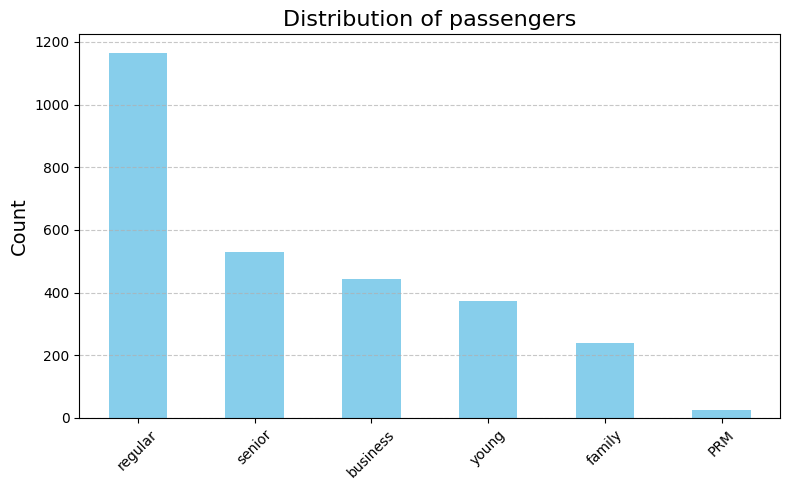

In [2]:

binary_cols = ['business', 'senior', 'family', 'young', 'PRM', 'regular']

# Count occurrences (1's) for each binary column, ignoring NaNs
counts = combined_df[binary_cols].sum().sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of passengers', fontsize=16)
plt.ylabel('Count', fontsize=14)
# plt.xlabel('Categories', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [3]:
combined_df['delta_time'] = (combined_df['Time End Baggage reclaim']-combined_df['Time Start Baggage drop off'])/60
combined_df['ETD_check_flag'] = combined_df['Time Start ETD check'].notna().astype(int)
combined_df['ETD_check_flag'].value_counts()

ETD_check_flag
0    2092
1     313
Name: count, dtype: int64

/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/1414192965.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='delta_time', data=df_long, palette='pastel')


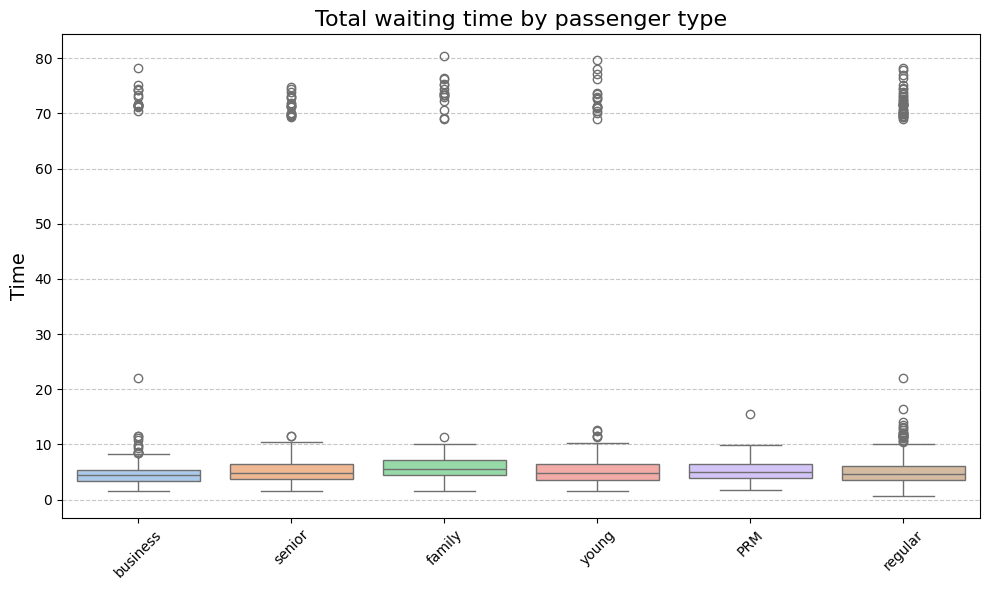

In [4]:
binary_cols = ['business', 'senior', 'family', 'young', 'PRM', 'regular']

# Prepare data in long-form for plotting
df_long = pd.melt(combined_df, id_vars=['delta_time'], value_vars=binary_cols,
                  var_name='Category', value_name='Indicator')

# Keep only rows where the binary indicator is 1 (ignore NaNs)
df_long = df_long[df_long['Indicator'] == 1]

# Plotting boxplots of delta_time for each category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='delta_time', data=df_long, palette='pastel')

plt.title('Total waiting time by passenger type', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/2535953961.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sheet_name', y='delta_time', data=df_plot, palette='pastel')


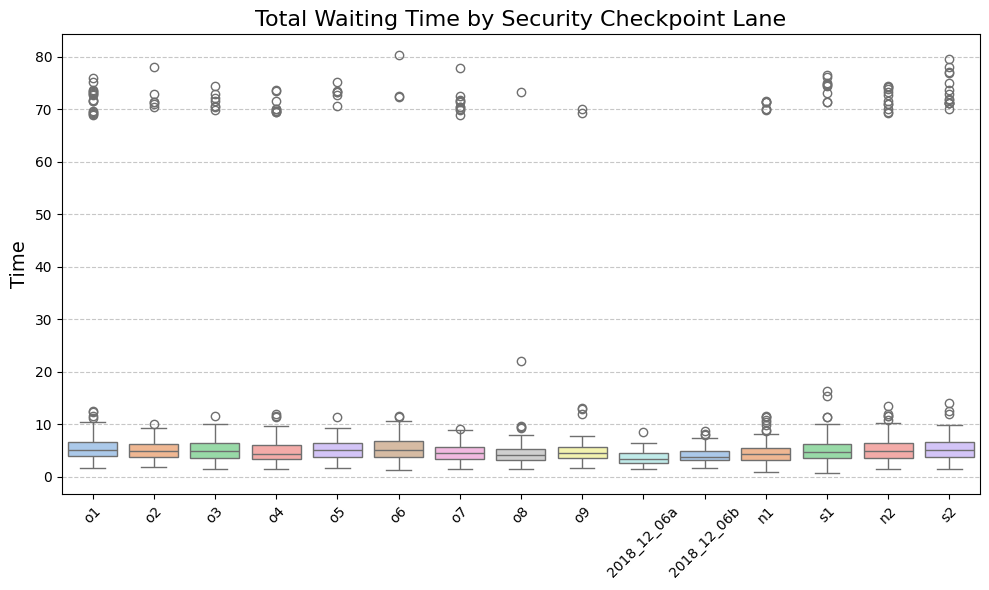

In [5]:

df_plot = combined_df.dropna(subset=['delta_time', 'sheet_name'])

# Plotting boxplots of delta_time by sheet_name
plt.figure(figsize=(10, 6))
sns.boxplot(x='sheet_name', y='delta_time', data=df_plot, palette='pastel')

plt.title('Total Waiting Time by Security Checkpoint Lane', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


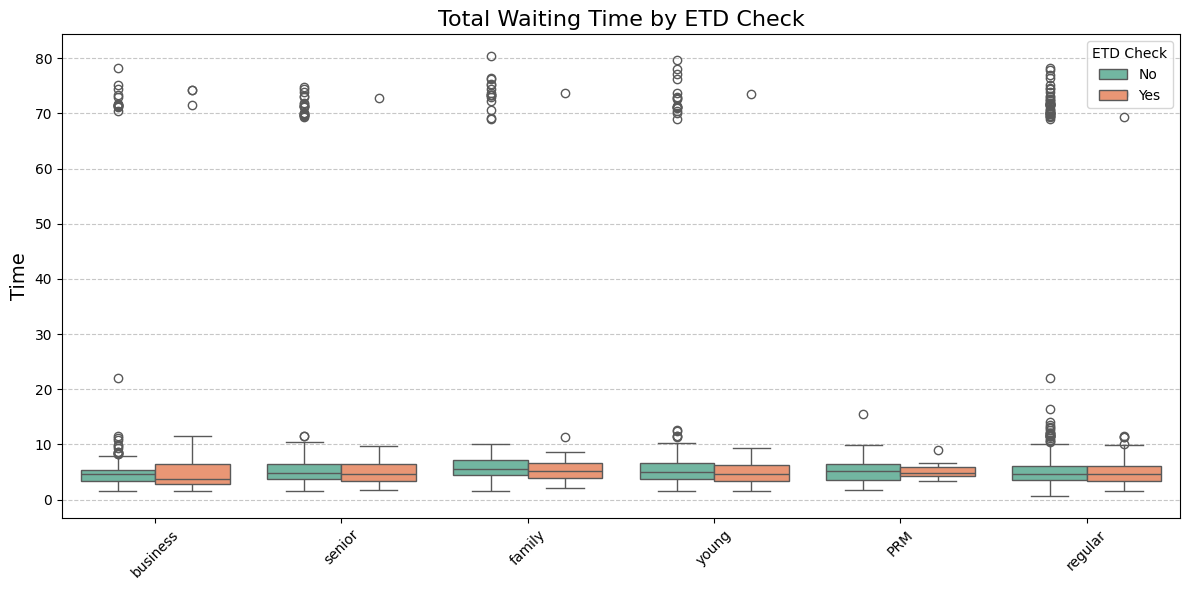

In [6]:
binary_cols = ['business', 'senior', 'family', 'young', 'PRM', 'regular']

# Ensure ETD_check_flag exists
combined_df['ETD_check_flag'] = combined_df['Time Start ETD check'].notna().astype(int)

# Reshape the data for plotting
df_long = pd.melt(combined_df, id_vars=['delta_time', 'ETD_check_flag'], value_vars=binary_cols,
                  var_name='Category', value_name='Indicator')

# Keep only rows where the binary variable is active (1)
df_long = df_long[df_long['Indicator'] == 1]

# Plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='Category', y='delta_time', hue='ETD_check_flag', data=df_long, palette='Set2')

plt.title('Total Waiting Time by ETD Check', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Modify legend labels and position
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Yes']  # Replace 0 with 'No' and 1 with 'Yes'
ax.legend(handles, new_labels, title='ETD Check', loc='upper right')

plt.tight_layout()
plt.show()


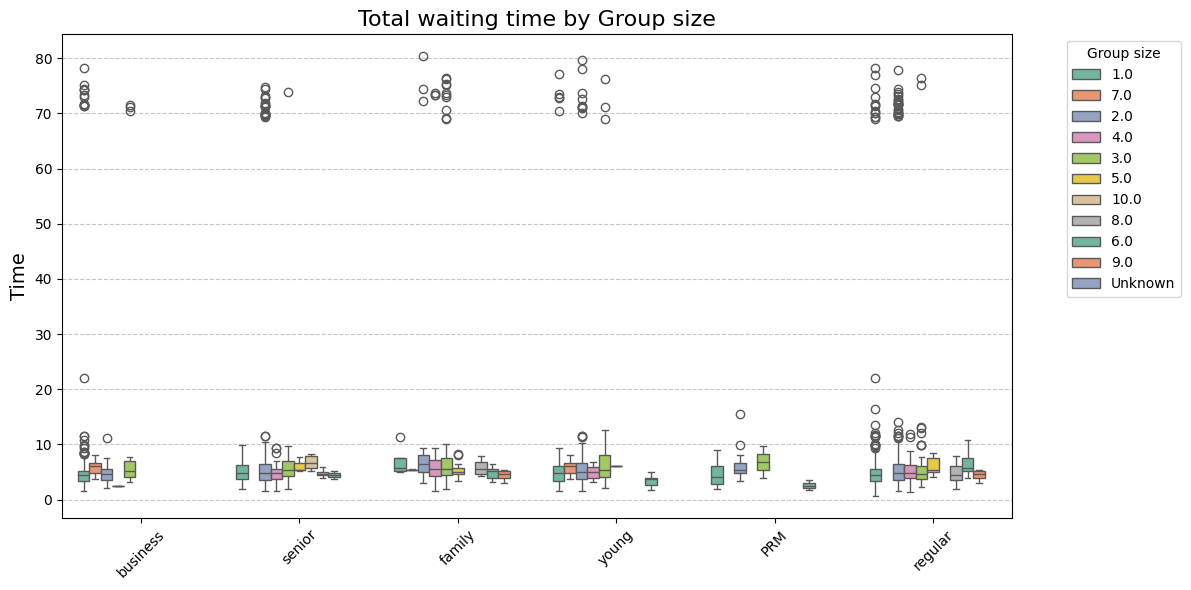

In [7]:
binary_cols = ['business', 'senior', 'family', 'young', 'PRM', 'regular']

# Ensure 'Group size' exists and is clean (optional: drop NaNs or convert to categorical)
combined_df = combined_df.copy()
combined_df['Group size'] = combined_df['Group size'].fillna('Unknown')  # or dropna if needed

# Reshape the data for plotting
df_long = pd.melt(combined_df, id_vars=['delta_time', 'Group size'], value_vars=binary_cols,
                  var_name='Category', value_name='Indicator')

# Keep only rows where the binary variable is active (1)
df_long = df_long[df_long['Indicator'] == 1]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='delta_time', hue='Group size', data=df_long, palette='Set2')

plt.title('Total waiting time by Group size', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Group size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/2560606279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_clean['Group size bin'] = pd.cut(
/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/2560606279.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_clean['Group size bin'] = pd.Categorical(


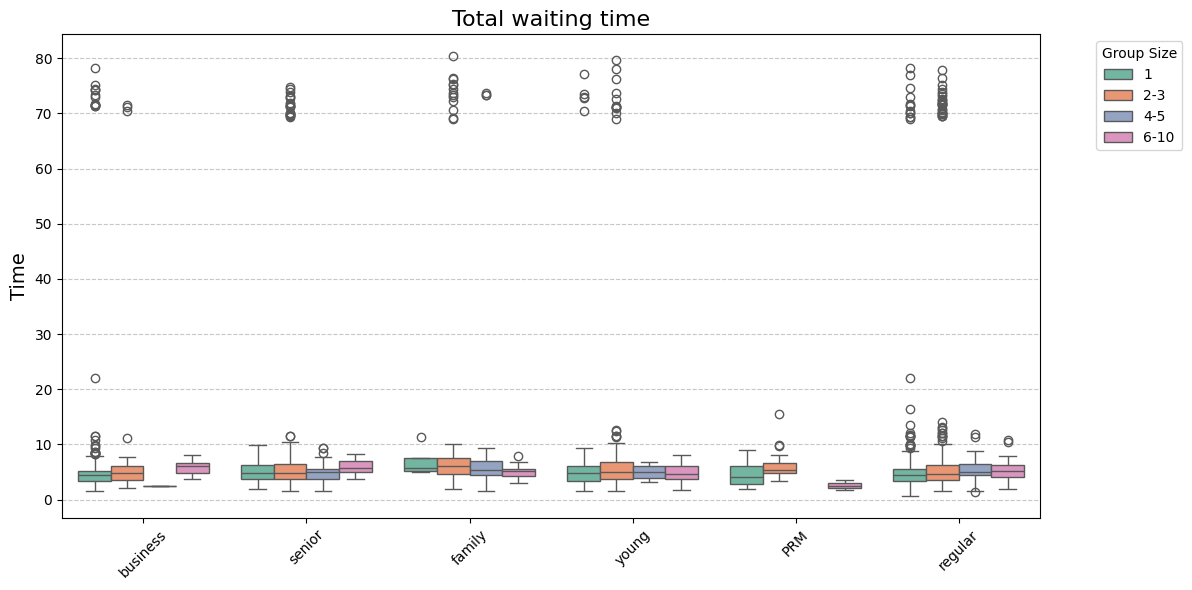

In [8]:

binary_cols = ['business', 'senior', 'family', 'young', 'PRM', 'regular']

# Drop rows with NaN in 'Group size' or 'delta_time'
combined_df_clean = combined_df.dropna(subset=['Group size', 'delta_time'])

# Bin numeric group sizes into categories
combined_df_clean['Group size bin'] = pd.cut(
    combined_df_clean['Group size'],
    bins=[0, 1, 3, 5, 10],
    labels=['1', '2-3', '4-5', '6-10'],
    right=True
)

# Set the bins as ordered categories
combined_df_clean['Group size bin'] = pd.Categorical(
    combined_df_clean['Group size bin'],
    categories=['1', '2-3', '4-5', '6-10'],
    ordered=True
)

# Reshape the data to long format for plotting
df_long = pd.melt(
    combined_df_clean,
    id_vars=['delta_time', 'Group size bin'],
    value_vars=binary_cols,
    var_name='Category',
    value_name='Indicator'
)

# Keep only rows where the binary indicator is 1
df_long = df_long[df_long['Indicator'] == 1]

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='delta_time', hue='Group size bin', data=df_long, palette='Set2')

plt.title('Total waiting time', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Group Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/753632726.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Number of boxes'] = df_plot['Number of boxes'].astype(int).astype(str)
/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/753632726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number of boxes', y='delta_time', data=df_plot, palette='pastel')


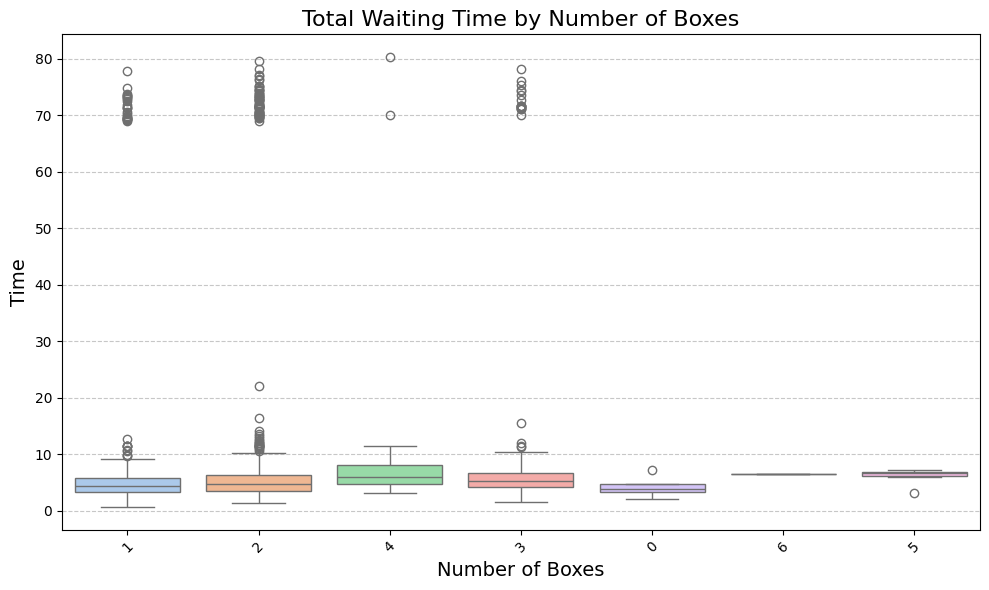

In [9]:

df_plot = combined_df.dropna(subset=['delta_time', 'Number of boxes'])

# Convert Number of boxes to categorical if there are many unique integers
df_plot['Number of boxes'] = df_plot['Number of boxes'].astype(int).astype(str)

# Plotting boxplots of delta_time by Number of boxes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Number of boxes', y='delta_time', data=df_plot, palette='pastel')

plt.title('Total Waiting Time by Number of Boxes', fontsize=16)
plt.xlabel('Number of Boxes', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/662301745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Group size'] = df_plot['Group size'].astype(int)
/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/662301745.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Group size (str)'] = df_plot['Group size'].astype(str)
/var/folders/46/30710m094qv2_dhfs08nzzd00000gn/T/ipykernel_92197/662301745.py:12: FutureWarning: 

Passing `palette` without assigning `

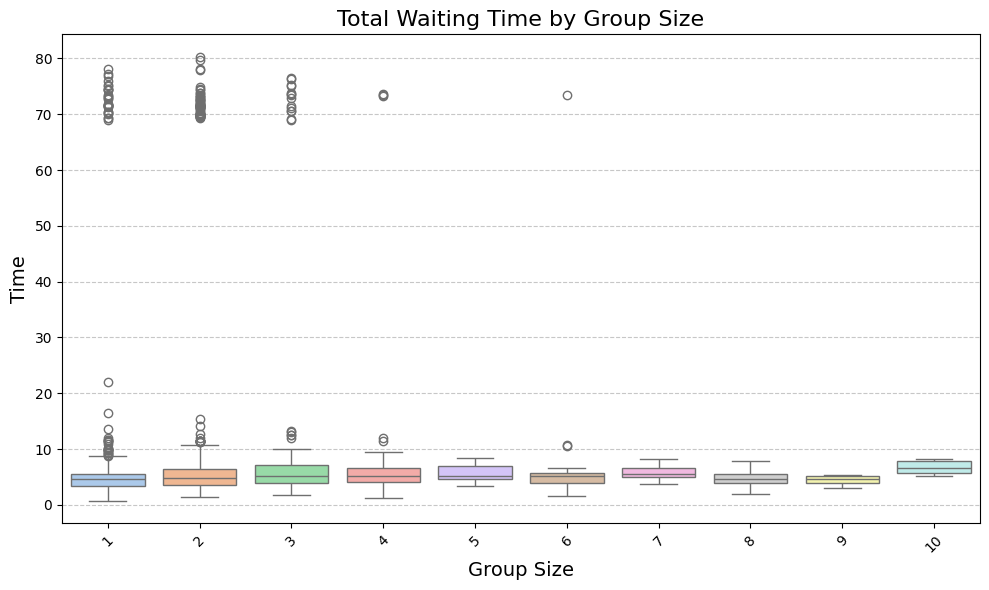

In [10]:

df_plot = combined_df.dropna(subset=['delta_time', 'Group size'])

# Ensure Group size is integer and sort it
df_plot['Group size'] = df_plot['Group size'].astype(int)

# Convert to string to treat as categorical on x-axis, sorted by size
df_plot['Group size (str)'] = df_plot['Group size'].astype(str)
ordered_sizes = sorted(df_plot['Group size'].unique().tolist())

# Plotting boxplots of delta_time by Group size
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group size (str)', y='delta_time', data=df_plot, palette='pastel',
            order=[str(i) for i in ordered_sizes])

plt.title('Total Waiting Time by Group Size', fontsize=16)
plt.xlabel('Group Size', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [11]:
# Group by 'sheet_name' and apply describe
grouped_stats = combined_df.groupby('sheet_name').describe()

# Display the result
print(grouped_stats)


            Lane number                                    business       ...  \
                  count mean  std  min  25%  50%  75%  max    count mean  ...   
sheet_name                                                                ...   
2018_12_06a        61.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     29.0  1.0  ...   
2018_12_06b        52.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0      3.0  1.0  ...   
n1                175.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     72.0  1.0  ...   
n2                321.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     62.0  1.0  ...   
o1                236.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     42.0  1.0  ...   
o2                151.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     63.0  1.0  ...   
o3                186.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      8.0  1.0  ...   
o4                162.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0     22.0  1.0  ...   
o5                115.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0      0.0  NaN  ...   
o6                138.0  3.0

In [12]:
"""missing_values = combined_df.groupby('sheet_name').apply(lambda x: x.isnull().sum())
print(missing_values)"""
missing_values = combined_df.isnull().sum()
print("Missing values per column:")
print(missing_values)



Missing values per column:
Comments                       1309
Lane number                       0
Date                              0
business                       1961
senior                         1875
family                         2166
young                          2033
PRM                            2380
regular                        1338
Experience                        2
Time Start Baggage drop off       1
Number of boxes                   2
Time End Baggage drop off         1
Time Start WTMD                   5
Time Start WTMD 2              2072
Time Start WTMD 3              2402
Time Start WTMD check          2191
Time End WTMD check            2192
Time Start ETD check           2092
Time End ETD check             2096
Time Start Baggage reclaim        9
Time End Baggage reclaim          9
Group size                        0
Time Start Baggage Check       2231
Time End Baggage Check         2236
sheet_name                        0
delta_time                        9
E

In [13]:
categorical_cols = combined_df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nValue counts for column: {col}")
    print(combined_df[col].value_counts())




Value counts for column: Comments
Comments
takes x-ray boxes with him                                            60
box away                                                              37
Reclaim outside queue                                                 36
takes x-ray boxes with her                                            24
boxes away                                                            24
                                                                      ..
mother + young child. etd; passenger + baggage                         1
2nd time wtmd (belt) 151542                                            1
ETD pax + luggage, reclaim largely outside queue                       1
Mum + kid (4 yo), WTMD twice (1819), reclaim largely outside queue     1
wtmd shoes (1047)                                                      1
Name: count, Length: 697, dtype: int64

Value counts for column: Date
Date
2018-12-18 00:00:00    596
2018-12-17 00:00:00    267
2018-02-23 00:00:00    2